<a href="https://colab.research.google.com/github/Vikash9570/ANN_practice/blob/main/ANN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# installing tensor flow library
!pip install tensorflow

In [2]:
#importing basic library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
# reading dataset
df=pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [6]:
# removing outlier and unwanted features
drop_col=["RowNumber","CustomerId","Surname","Geography"]
df.drop(drop_col,axis=1,inplace=True)

In [7]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
# saperating target feature
df=df.iloc[:,:-1]
df_target=df.iloc[:,-1]

In [9]:
df.isna().sum()

CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

**feature engineering**

In [10]:
categorical_cols=df.select_dtypes(include="object").columns
numerical_cols=df.select_dtypes(exclude="object").columns

In [11]:
# detecting outlier
def outlier(df):
    for i in df.columns:
      if i not in categorical_cols:
        iqr=np.quantile(df[i],0.75)-np.quantile(df[i],0.25)
        low_bound=np.quantile(df[i],0.25)-1.5*iqr
        up_bound=np.quantile(df[i],0.75)+1.5*iqr
        print(i)
        print(df[(df[i]<low_bound)|(df[i]>up_bound)][i].shape[0])
        # print(df[i]<low_bound)
        # print(df[df[i]>up_bound][i]=="True")
        print("="*20)



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.2+ KB


In [13]:
outlier(df)

CreditScore
15
Age
359
Tenure
0
Balance
0
NumOfProducts
60
HasCrCard
0
IsActiveMember
0
EstimatedSalary
0


There are some outliers in this dataset so we try to find accuracy of ANN model with outliers and without outliers.

In [14]:
# df_with_outlier=df_out
# df_without_outlier=df_not
df_out=df.copy()
df_not=df.copy()

In [44]:
# Gender=pd.get_dummies(df_out["Gender"],drop_first=True)
# df_out=df_out.drop("Gender",axis=1)
# df_out=pd.concat([df_out,Gender],axis=1)
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test=train_test_split(df_not,df_target,test_size=0.3,random_state=42)
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

to remove outlier for catogerical columns we use mode while for others we use median,since numerical col has categorical features therefore we saperate these features.

first onehot encoding for gender.

In [15]:
Gender=pd.get_dummies(df_not["Gender"],drop_first=True)

In [16]:
df_not=df_not.drop("Gender",axis=1)


In [17]:
df_not=pd.concat([df_not,Gender],axis=1)

In [18]:
df_not

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male
0,619,42,2,0.00,1,1,1,101348.88,0
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,0
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1
9996,516,35,10,57369.61,1,1,1,101699.77,1
9997,709,36,7,0.00,1,0,1,42085.58,0
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [19]:
cat_num_col=["NumOfProducts",	"HasCrCard"	,"IsActiveMember"]
def remove_outlier(df):
  for i in df.columns:
      if (i not in cat_num_col):
        iqr=np.quantile(df[i],0.75)-np.quantile(df[i],0.25)
        low_bound=np.quantile(df[i],0.25)-1.5*iqr
        up_bound=np.quantile(df[i],0.75)+1.5*iqr
        df.loc[(df[i]<low_bound)|(df[i]>up_bound),i]=df[i].median()
      elif i =="NumOfProducts":
        iqr=np.quantile(df[i],0.75)-np.quantile(df[i],0.25)
        low_bound=np.quantile(df[i],0.25)-1.5*iqr
        up_bound=np.quantile(df[i],0.75)+1.5*iqr
        df.loc[(df[i]<low_bound)|(df[i]>up_bound),i]=df[i].mode()[0]

In [20]:
remove_outlier(df_not)


In [21]:
df_not

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male
0,619,42,2,0.00,1,1,1,101348.88,0
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,0
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1
9996,516,35,10,57369.61,1,1,1,101699.77,1
9997,709,36,7,0.00,1,0,1,42085.58,0
9998,772,42,3,75075.31,2,1,0,92888.52,1


In [23]:
outlier(df_not)

CreditScore
0
Age
167
Tenure
0
Balance
0
NumOfProducts
0
HasCrCard
0
IsActiveMember
0
EstimatedSalary
0
Male
0


In [24]:
df_not["Age"].median()

37.0

<Axes: >

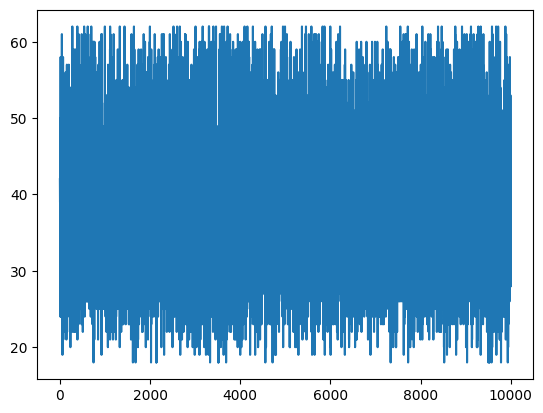

In [25]:
df_not["Age"].plot()

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_not,df_target,test_size=0.3,random_state=42)

In [27]:
# scaling data

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

importing important libraries

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [29]:
# initializing the ANN model
classifier=Sequential()

In [30]:
# Adding input layer
classifier.add(Dense(units=8,activation="relu"))

In [31]:
# adding first hidden layer
classifier.add(Dense(units=7,activation="relu"))

In [32]:
# adding second hidden layer
classifier.add(Dense(units=6,activation="relu"))

In [33]:
# adding output layer
classifier.add(Dense(units=1,activation="sigmoid"))

In [40]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [42]:
classifier.compile(optimizer=opt, loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model_history =classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=200)